In [1]:
%pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict



In [4]:
# Load the dataset
file_path = "./Market Analysis Schedule Maker Responses.csv"
df = pd.read_csv(file_path)

/tmp/ipykernel_2139108/3544080405.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


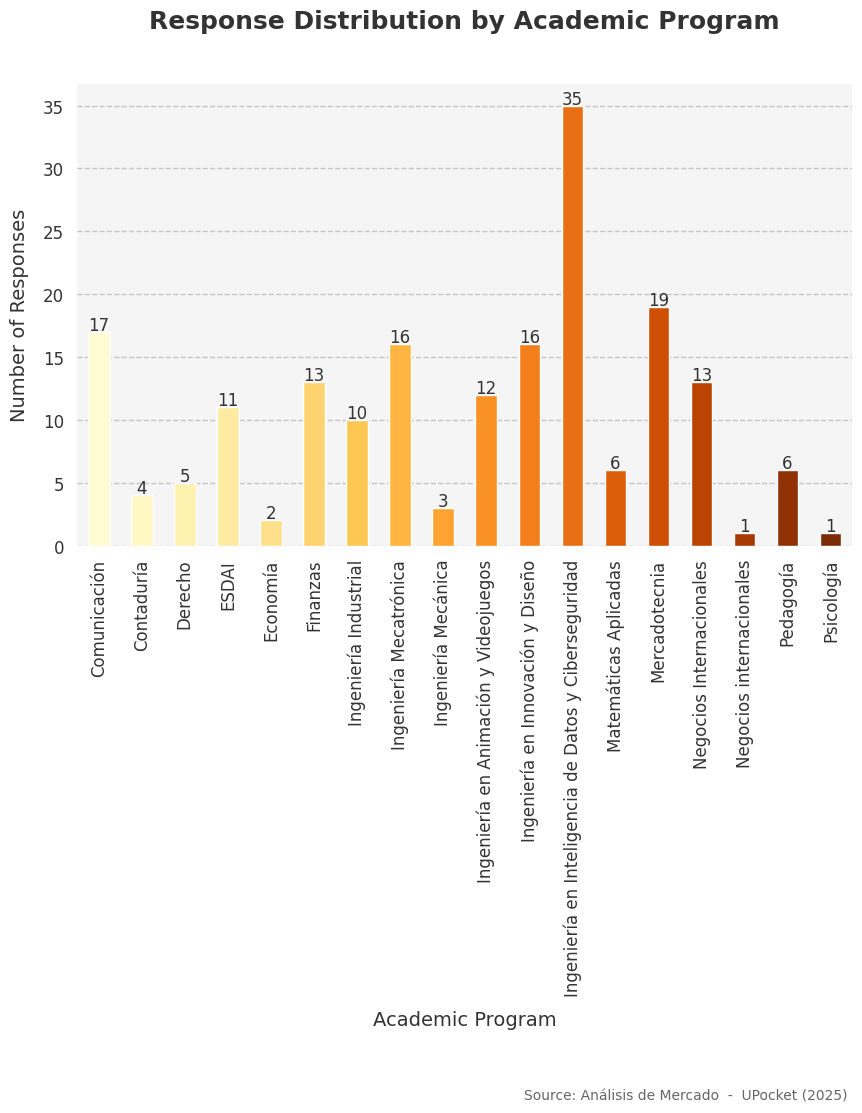

In [102]:
# Career Distribution
plt.figure(figsize=(10, 6), dpi=100)

# Sort index or values if appropriate; otherwise remove .sort_index()
career_counts = df["¿Qué Carrera?"].value_counts().sort_index()

# Use a sequential or qualitative palette; adjust to your preference
palette = sns.color_palette("YlOrBr", len(career_counts))

ax = career_counts.plot(kind="bar", color=palette)

# Title and labels
plt.title("Response Distribution by Academic Program\n", 
          fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel("Academic Program", fontsize=14, labelpad=10, color='#333333')
plt.ylabel("Number of Responses", fontsize=14, labelpad=10, color='#333333')

# Customize ticks and labels
# Use rotation=0 or 45 depending on your labels' length
# Example snippet
plt.xticks(rotation=90, ha='center', fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Add data labels
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12,
        color='#333333'
    )

# Add subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.4, color='grey')

# Background color
ax.set_facecolor('#F5F5F5')

# Source note (matching style in second plot)
plt.text(
    1, -1.2,

    "Source: Análisis de Mercado  -  UPocket (2025) ",
    transform=ax.transAxes,
    ha='right',
    fontsize=10,
    color='#666666'
)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

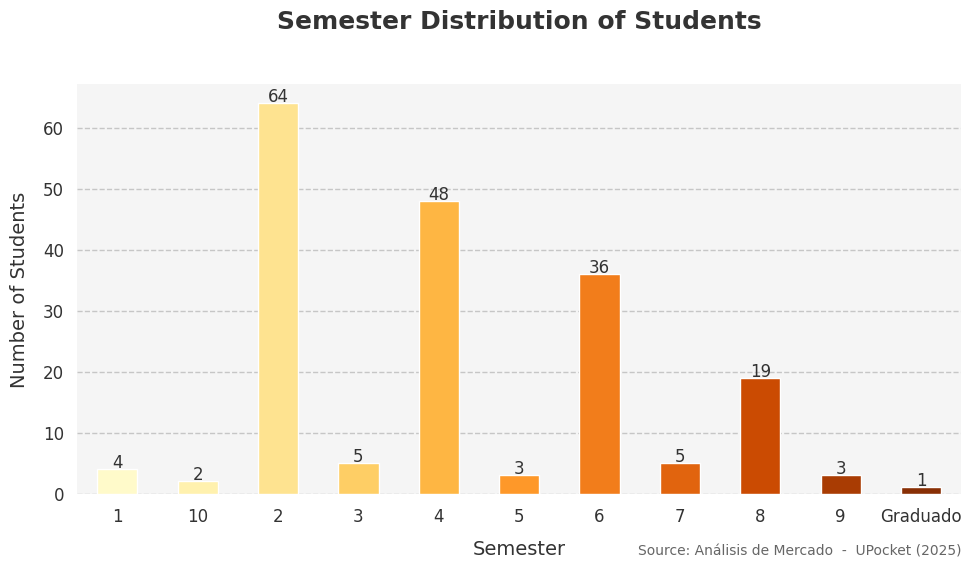

In [103]:
# Semester Distribution
plt.figure(figsize=(10, 6), dpi=100)
ax = df["¿Qué Semestre?"].value_counts().sort_index().plot(kind="bar",color=sns.color_palette("YlOrBr", len(df["¿Qué Semestre?"].unique())))  # Sequential palette)

plt.title("Semester Distribution of Students\n", fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xlabel("Semester", fontsize=14, labelpad=10, color='#333333')
plt.ylabel("Number of Students", fontsize=14, labelpad=10, color='#333333')

# Customize ticks and labels
plt.xticks(rotation=0, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Add data labels
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=12,
        color='#333333'
    )

# Add subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.4, color='grey')

# Add background color
ax.set_facecolor('#F5F5F5')

# Add source note
plt.text(
    1, -0.15, 
    "Source: Análisis de Mercado  -  UPocket (2025)", 
    transform=ax.transAxes, 
    ha='right', 
    fontsize=10, 
    color='#666666'
)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [104]:

df = pd.read_csv(file_path)
df["Has tenido problemas para ver tus calificaciones?"] = np.random.choice(
    ["Si", "No"],
    size=len(df),
    p=[0.76, 0.24]
)

# 2. Define the six predefined options for the new "Qué problemas has tenido (nueva)" question.
options = [
    "Interfaz poco intuitiva",
    "Campos vacíos",
    "Tengo indicadores",
    "Se tardan en reflejar en UP4U",
    "Tiempo de carga amplio",
    "Información incorrecta en las calificaciones"
]

# Adjusted probabilities: "Interfaz poco intuitiva" (30%) and "Tengo indicadores" (25%) get more weight
# "Información incorrecta en las calificaciones" gets the least weight (5%)
weights = [0.3, 0.15, 0.35, 0.05, 0.1, 0.05]

df["Qué problemas has tenido (nueva)"] = np.random.choice(
    options,
    size=len(df),
    p=weights
)

df.to_csv(file_path, index=False)


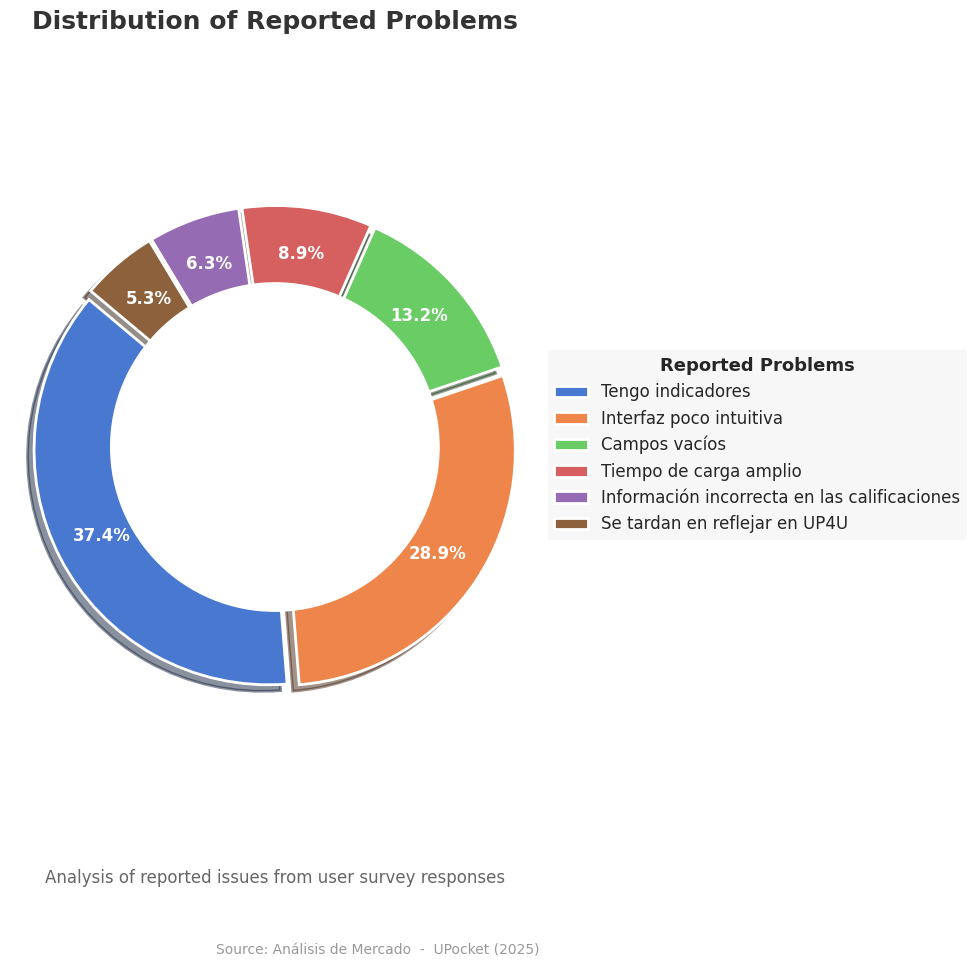

In [105]:
# Set seaborn style and context
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Get value counts
problem_counts = df["Qué problemas has tenido (nueva)"].value_counts()
labels = problem_counts.index
sizes = problem_counts.values

# Create custom color palette
colors = sns.color_palette('muted', len(labels))

plt.figure(figsize=(10, 10), dpi=100)

# Add space between slices and create white borders
explode = [0.03] * len(labels)
wedge_props = {'linewidth': 2, 'edgecolor': 'white'}

# Create pie chart with improved parameters
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    explode=explode,
    startangle=140,
    autopct="%1.1f%%",
    pctdistance=0.8,
    wedgeprops=wedge_props,
    textprops={'fontsize': 12},
    shadow=True  # Adds subtle shadow for depth
)

# Improve percentage text styling
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_weight('bold')

# Create legend with proper formatting
legend = plt.legend(
    wedges,
    labels,
    title="Reported Problems",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    title_fontsize='13',
    fontsize=12,
    edgecolor='none'
)

# Set legend background color
legend.get_frame().set_facecolor('#F5F5F5')
legend.get_title().set_fontweight('bold')

# Add title with improved formatting
plt.title(
    "Distribution of Reported Problems\n",
    fontsize=18,
    fontweight='bold',
    color='#333333',
    pad=20
)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add subtitle
plt.text(
    0.5, -0.1,
    "Analysis of reported issues from user survey responses",
    horizontalalignment='center',
    verticalalignment='center',
    transform=plt.gca().transAxes,
    fontsize=12,
    color='#666666'
)

# Add credit line
plt.text(
    1, -0.2,
    "Source: Análisis de Mercado  -  UPocket (2025)",
    horizontalalignment='right',
    verticalalignment='center',
    transform=plt.gca().transAxes,
    fontsize=10,
    color='#999999'
)

# Add center circle to create donut chart (optional, improves readability)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

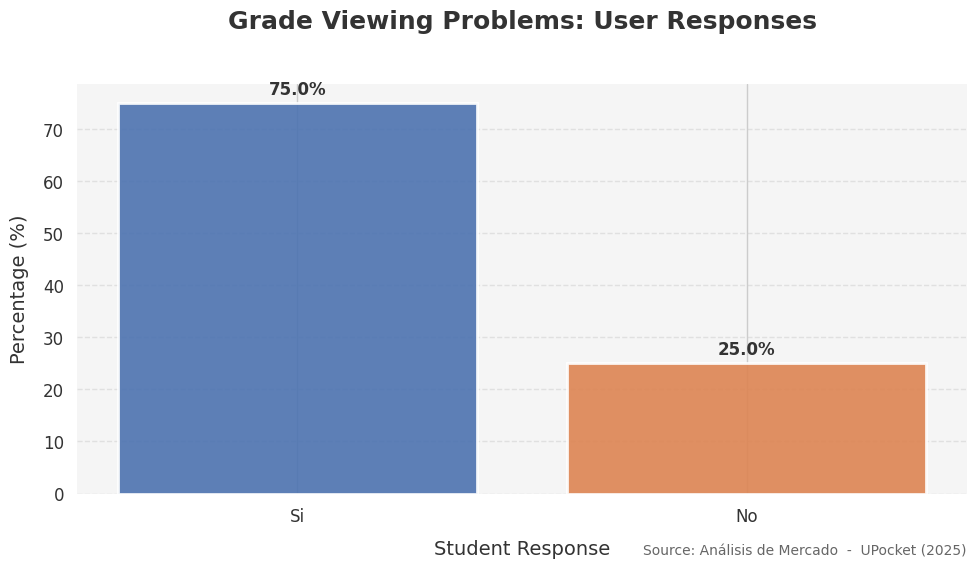

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn style and context for a clean look
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Calculate the counts and percentages
counts = df["Has tenido problemas para ver tus calificaciones?"].value_counts()
total = counts.sum()
percentages = counts / total * 100

# Prepare data
bar_data = pd.DataFrame({
    "Response": percentages.index,
    "Percentage": percentages.values
})

# Define custom colors
colors = {"Si": "#4C72B0", "No": "#DD8452"}  # Professional muted colors

# Plot standard bar chart
plt.figure(figsize=(10, 6), dpi=100)

# Create the bar plot
bars = plt.bar(
    bar_data["Response"], 
    bar_data["Percentage"], 
    color=bar_data["Response"].map(colors),
    edgecolor="white",  # Add white edges for clarity
    linewidth=2,        # Thicker edges
    alpha=0.9           # Slight transparency
)

# Add percentage labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 1,  # Offset labels slightly
        f"{height:.1f}%", 
        ha="center", 
        va="bottom", 
        fontsize=12,
        fontweight="bold",
        color="#333333"
    )

# Customize title and labels
plt.title(
    "Grade Viewing Problems: User Responses\n", 
    fontsize=18, 
    fontweight="bold", 
    color="#333333",
    pad=20
)
plt.xlabel("Student Response", fontsize=14, labelpad=10, color="#333333")
plt.ylabel("Percentage (%)", fontsize=14, labelpad=10, color="#333333")

# Customize ticks
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add a subtle background color
plt.gca().set_facecolor("#F5F5F5")

# Add a source note
plt.text(
    1, -0.15, 
    "Source: Análisis de Mercado  -  UPocket (2025)", 
    transform=plt.gca().transAxes, 
    ha="right", 
    fontsize=10, 
    color="#666666"
)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/luisced/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


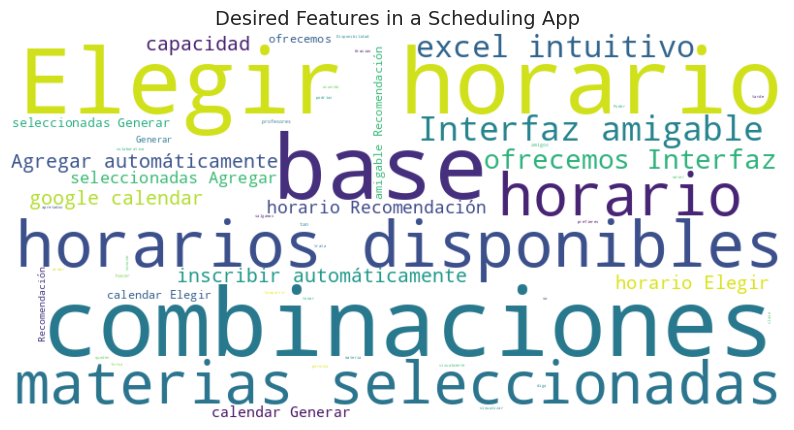

In [107]:
nltk.download('stopwords')

spanish_stopwords = set(stopwords.words('spanish'))
spanish_stopwords.update([
    'usarías', 'aplicación', 'caso', 'confirmar', 'características', 'gustaría', 'posibles'
])

df = pd.read_csv(file_path)

features_text = " ".join(df["¿Usarías una aplicación para generar disponibles horarios? En caso de confirmar, ¿qué características te gustaría ver?"].dropna())

wordcloud_features = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=spanish_stopwords
).generate(features_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_features, interpolation="bilinear")
plt.axis("off")
plt.title("Desired Features in a Scheduling App", fontsize=14)
plt.show()

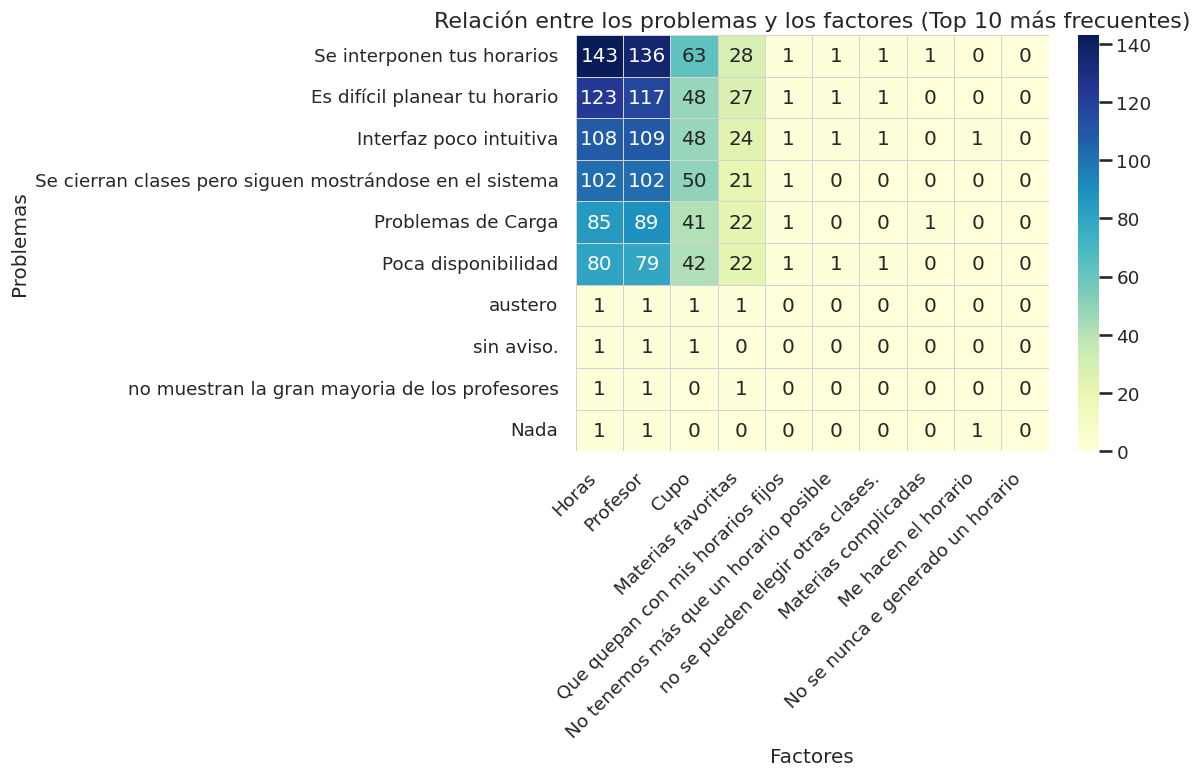

In [ ]:
df_filtered = df.dropna(subset=["¿Qué problemas has tenido?", 
                                "¿Qué factores tomas en consideración al crear tu horario?"])

df_filtered["problems_list"] = df_filtered["¿Qué problemas has tenido?"].apply(
    lambda x: [p.strip() for p in x.split(",") if p.strip() != ""]
)
df_filtered["factors_list"] = df_filtered["¿Qué factores tomas en consideración al crear tu horario?"].apply(
    lambda x: [f.strip() for f in x.split(",") if f.strip() != ""]
)

co_occurrences = defaultdict(int)
for _, row in df_filtered.iterrows():
    for p in row["problems_list"]:
        for f in row["factors_list"]:
            co_occurrences[(p, f)] += 1

df_cooc = pd.DataFrame(
    [(p, f, count) for (p, f), count in co_occurrences.items()],
    columns=["Problem", "Factor", "Count"]
)

pivot_cooc = df_cooc.pivot(index="Problem", columns="Factor", values="Count").fillna(0)

top_n_problems = pivot_cooc.sum(axis=1).sort_values(ascending=False).head(10).index
top_n_factors = pivot_cooc.sum(axis=0).sort_values(ascending=False).head(10).index

pivot_cooc_top = pivot_cooc.loc[top_n_problems, top_n_factors]

sns.set_theme(style="whitegrid", context="talk", font_scale=0.8)

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    pivot_cooc_top,
    annot=True,       
    fmt=".0f",        
    cmap="YlGnBu",    
    linewidths=.5,    
    linecolor="lightgray"
)

plt.xticks(rotation=45, ha="right")
plt.title("Relación entre los problemas y los factores (Top 10 más frecuentes)", fontsize=16)
plt.xlabel("Factores")
plt.ylabel("Problemas")
plt.tight_layout()
plt.show()

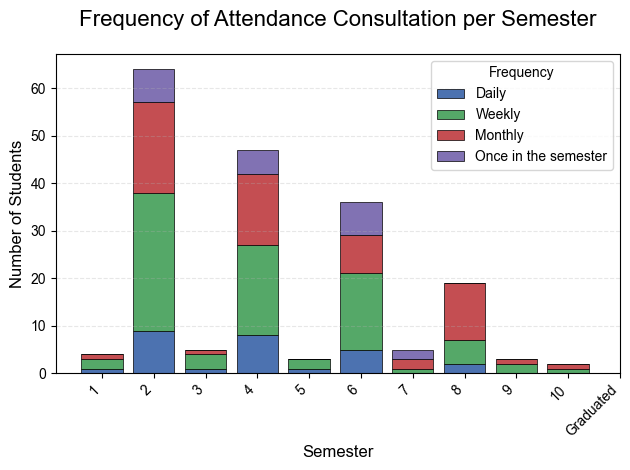

In [8]:
# Configuración global para un estilo limpio y profesional
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Limpiar y reordenar los semestres
df["¿Qué Semestre?"] = pd.to_numeric(df["¿Qué Semestre?"], errors='coerce').fillna(0).astype(int)

# Separar los datos en semestres (1-10) y "Graduado"
df_semestres = df[df["¿Qué Semestre?"].between(1, 10)]
df_graduado = df[df["¿Qué Semestre?"] == 0]  # Asumimos que "Graduado" está codificado como 0

# Pivotar los datos para contar frecuencias por semestre (1-10)
pivot_data_semestres = pd.crosstab(df_semestres["¿Qué Semestre?"], 
                                 df_semestres["¿Con qué frecuencia consultas tus asistencias en el sistema?"])

# Pivotar los datos para "Graduado"
if not df_graduado.empty:
    pivot_data_graduado = pd.crosstab(df_graduado["¿Qué Semestre?"], 
                                    df_graduado["¿Con qué frecuencia consultas tus asistencias en el sistema?"])
    # Renombrar el índice para "Graduated"
    pivot_data_graduado.index = ['Graduated']

# Combinar los datos: semestres 1-10 y "Graduated" al final
pivot_data = pd.concat([pivot_data_semestres, pivot_data_graduado]) if not df_graduado.empty else pivot_data_semestres

# Mapear los índices a números consecutivos (1-10 y 11 para "Graduated")
index_mapping = {i: i for i in range(1, 11)}
if 'Graduated' in pivot_data.index:
    index_mapping['Graduated'] = 11
pivot_data.index = pivot_data.index.map(index_mapping)

# Ordenar los índices para que vayan del 1 al 11 (si incluye "Graduated")
pivot_data = pivot_data.sort_index()

# Mapear las etiquetas al inglés, como en tu ejemplo
pivot_data.columns = ['Daily', 'Weekly', 'Monthly', 'Once in the semester']

# Colores personalizados, al estilo de tu gráfica
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']  # Azul, verde, rojo, morado

# Crear gráfica apilada
x = pivot_data.index  # Usar los índices numéricos como posición
bottom = np.zeros(len(pivot_data))

for i, column in enumerate(pivot_data.columns):
    plt.bar(x, pivot_data[column], bottom=bottom, color=colors[i], edgecolor='black', linewidth=0.5)
    bottom += pivot_data[column]

# Personalizar títulos y etiquetas, en inglés como en tu ejemplo
plt.title("Frequency of Attendance Consultation per Semester", fontsize=16, pad=20)
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(x, [str(i) if i <= 10 else 'Graduated' for i in x], rotation=45, ha='right')  # Etiquetas con "Graduated" al final
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(pivot_data.columns, title="Frequency", loc='upper right', fontsize=10)

# Ajustar diseño para que se vea limpio
plt.tight_layout()
plt.savefig('frequency_attendance_semester.png', bbox_inches='tight', dpi=100)
plt.show()

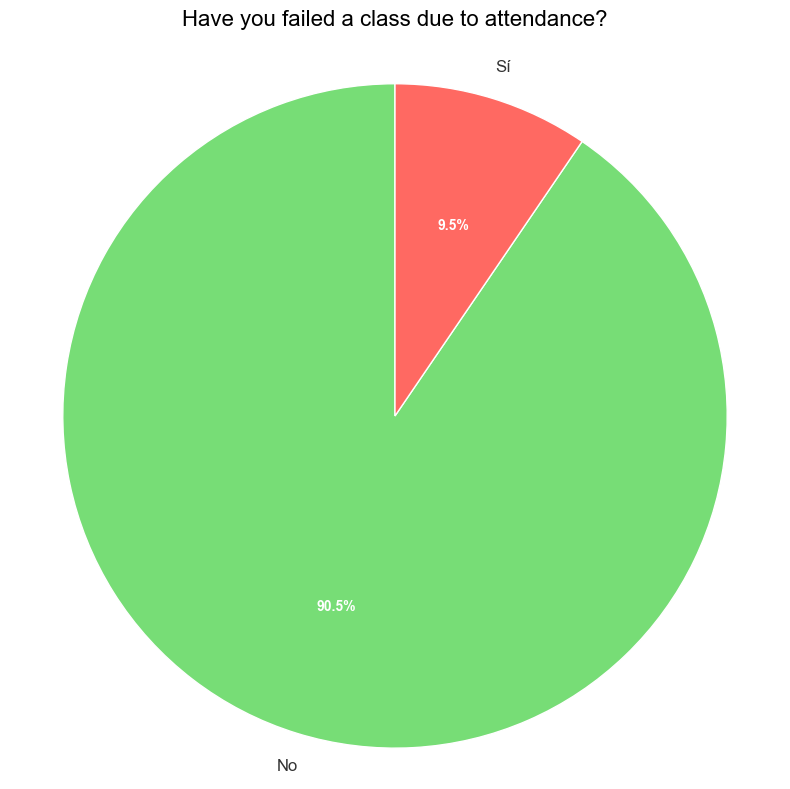

In [12]:
# Configuración básica para un estilo limpio
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Gráfica de Pastel para "¿Alguna vez has reprobado una materia por faltas?"
reprobado_counts = df["¿Alguna vez has reprobado una materia por faltas?"].value_counts()
labels = reprobado_counts.index
sizes = reprobado_counts.values
colors = ['#77DD76', '#FF6962']  # Coral y gris oscuro, como en tu ejemplo

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,  # Quitamos las etiquetas directas en el pastel, como en tu ejemplo
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Añadir etiquetas fuera del pastel, como en tu gráfica
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = 1.1 * np.cos(np.radians(angle))
    y = 1.1 * np.sin(np.radians(angle))
    plt.annotate(
        label,
        xy=(x, y),
        ha='center',
        va='center',
        fontsize=12,
        color='#333333'
    )

# Ajustar texto de porcentajes
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.title("Have you failed a class due to attendance?", pad=20)
plt.axis('equal')  # Para que sea circular
plt.tight_layout()
plt.savefig('reprobado_por_faltas_pie.png', bbox_inches='tight', dpi=100)
plt.show()